In [2]:
import numpy as np
import pandas as pd

# 전이확률행렬(Transition Probability Matrix)

In [14]:
mat = [[0 for i in range(24)] for i in range(24)] 

    #전, 현, 후, 파괴확률
k = [[0, 0.05, 0.95, 0],#0
     [0, 0.1,0.9,0],#1
     [0, 0.15,0.85,0],#2
     [0, 0.15,0.85,0],#3
     [0, 0.2,0.8,0],#4
     [0,0.25,0.75,0],#5
     [0.3,0,0.7,0],#6
     [0.35,0,0.65,0],#7
     [0.4,0,0.6,0],#8
     [0.45,0,0.55,0], #9
     [0,0.55,0.45,0], #10
     [0.65,0,0.35,0], #11
     [0.69,0,0.3,0.01], #12
     [0.69,0,0.3,0.01], #13
     [0.69,0,0.3,0.01], #14
     [0,0.68,0.3,0.02], #15
     [0.68, 0,0.3,0.02], #16
     [0.68, 0,0.3,0.02], #17
     [0.67, 0,0.3,0.03], #18
     [0.67, 0,0.3,0.03], #19
     [0,0.63,0.3,0.07], #20
     [0.63,0,0.3,0.07]] #21
     

for i in range(22):
    lst = k[i]
    for j in range(len(lst)):
        if lst[j] == 0:
            continue
        else:
            if j == 0:
                mat[i][i-1] = lst[j]
            elif j == 1:
                mat[i][i] = lst[j]
            elif j == 2:
                mat[i][i+1] = lst[j]
            else:
                mat[i][-1] = lst[j]

P = np.array(mat)
mat = pd.DataFrame(P)

# transient state간의 전이확률
T = np.array(mat.iloc[:22,:22])

# absorbing state간의 전이확률
R = np.array(mat.iloc[:22:,-2:])

In [15]:
T

array([[0.05, 0.95, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.1 , 0.9 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.15, 0.85, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.15, 0.85, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.2 , 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.75, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.7 , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 

In [16]:
R

array([[0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.01],
       [0.  , 0.01],
       [0.  , 0.01],
       [0.  , 0.02],
       [0.  , 0.02],
       [0.  , 0.02],
       [0.  , 0.03],
       [0.  , 0.03],
       [0.  , 0.07],
       [0.3 , 0.07]])

# 결국 어디로 흡수되는가?

In [17]:
I = np.eye(len(T))
# 기본 행렬(elementary matrix)
E = np.linalg.inv(I-T)
e = np.ones(len(T)).reshape(-1,1)

# i번째 행에서 출발해 absorbing state j로 흡수될 확률
print(np.matmul(E,R))

[[0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.04882069 0.95117931]
 [0.05044804 0.94955196]
 [0.05587256 0.94412744]
 [0.07021138 0.92978862]
 [0.07489214 0.92510786]
 [0.09049467 0.90950533]
 [0.13189338 0.86810662]
 [0.23753983 0.76246017]
 [0.49723757 0.50276243]
 [0.61325967 0.38674033]]


In [10]:
# i번째 행에서 출발해 흡수되기 전까지 각 state로의 평균 방문 횟수
print(np.matmul(E,e))

[[187.676653  ]
 [186.62402142]
 [185.51291031]
 [184.33643972]
 [183.15996913]
 [181.90996913]
 [180.5766358 ]
 [178.5766358 ]
 [175.96125119]
 [172.55099478]
 [167.94260317]
 [165.72038095]
 [158.73625396]
 [144.63063703]
 [113.67540599]
 [ 42.93422146]
 [ 42.46316956]
 [ 40.89299655]
 [ 36.72680416]
 [ 27.76165492]
 [  7.18232044]
 [  5.52486188]]


# 평균적으로 사용하는 금액은 어느정도인가?

In [18]:
money = [136000,271000,406000,541000,676000,811000,946000,1081000,1216000,1351000,
         10940700, 13837700, 17175800, 20980200, 25275900, 30087200, 35437900,
         41351400, 47850600, 54958200, 62696400, 71087200]

# state에 들어갈 때마다 사용하는 금액
money = np.array(money).reshape(-1,1)

# state 0에서 시작했을 때 흡수되기 전까지 각 state로의 평균 방문 횟수
E_0 = E[0].reshape(-1,1)

# 파괴되든 성공하든 어느 한 쪽으로 흡수될 때까지 사용하는 평균 금액
np.matmul(E_0.T, money)

array([[2.91272078e+09]])

# 성공확률 p가 0.05인 기하분포

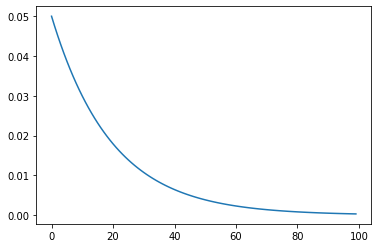

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange(1,101)
lst = []

for i in x:
    lst.append((0.95)**(i-1)*0.05)

import pylab
pylab.plot(range(len(lst)),lst)